# Visualization of a dataset with 2 digits of different size

In [13]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import src.data_generation
from src.data_generation.Dataset import Dataset
import importlib

importlib.reload(src.data_generation.Dataset)
from src.data_generation.Dataset import Dataset

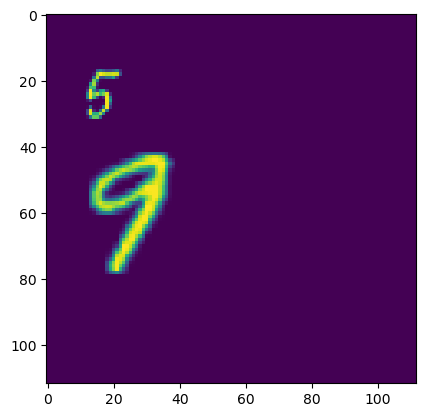

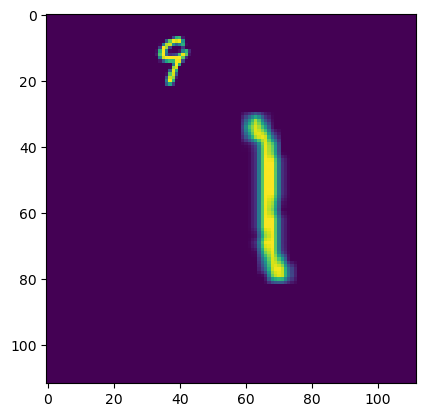

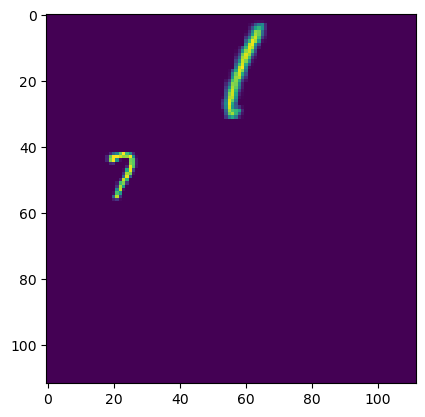

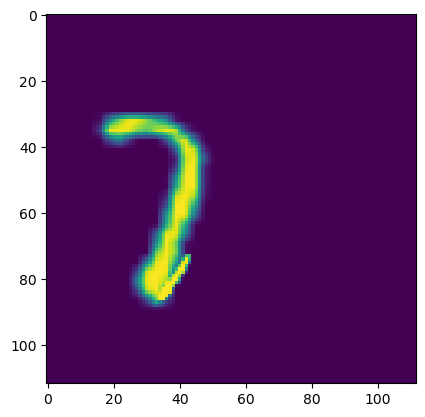

In [16]:
dataset = Dataset()
images = dataset.generate_two_digits_varying_size_randomly_placed(n_images=4,
                                                         img_shape=(112, 112))
for img in images:
    plt.imshow(img)
    plt.show()

# Visualization of step-by-step without using class Dataset

In [17]:
from src.data_generation.load_data import load_mnist, sample_uniformly_imgs #, load_imagenet
from src.data_generation.utils import downsample_img, crop_digit, get_bottom_right_corner_to_match_shapes
from src.data_generation.create_data import overlay_small_img_on_large_img_at_random_position

In [18]:
importlib.reload(src.data_generation.create_data)
from src.data_generation.create_data import overlay_small_img_on_large_img_at_random_position

In [19]:
#seed = 222
n_sampled_digits = 2

mnist_dataset_train, mnist_dataset_test = load_mnist()

sampled_digit_images = sample_uniformly_imgs(
    mnist_dataset_train, n_sampled_digits) #, seed)

first_digit = sampled_digit_images[0]
second_digit = sampled_digit_images[1]

In [20]:
canvas_height = 112
canvas_width = 112
canvas = np.zeros((canvas_height, canvas_width))

min_size = 20
max_size = 80
scale = 10
size_first_digit = min_size
size_second_digit = np.random.randint(
    min_size / scale, (max_size / scale) + 1) * scale

## Set the proper dimensions

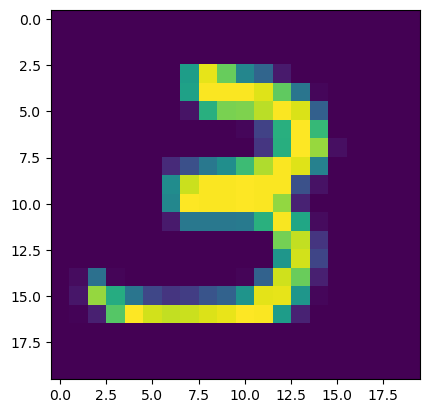

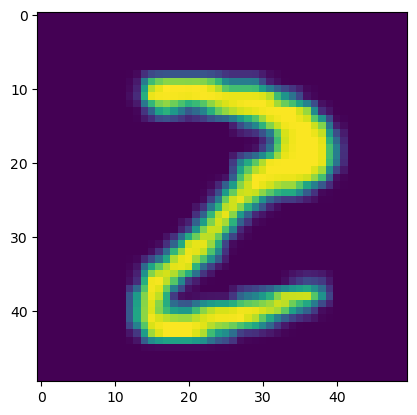

In [21]:
first_digit = downsample_img(first_digit, size_first_digit,
                             size_first_digit, grayscale=True)
second_digit = downsample_img(second_digit, size_second_digit,
                              size_second_digit, grayscale=True)
plt.imshow(first_digit)
plt.show()
plt.imshow(second_digit)
plt.show()

## Cropping out the background

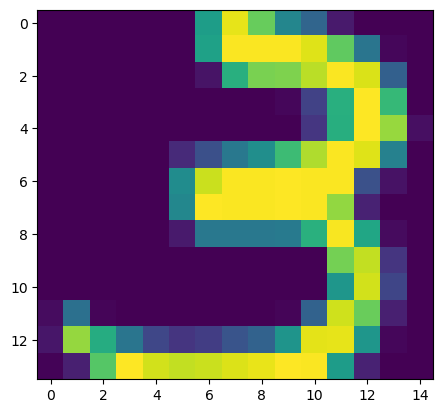

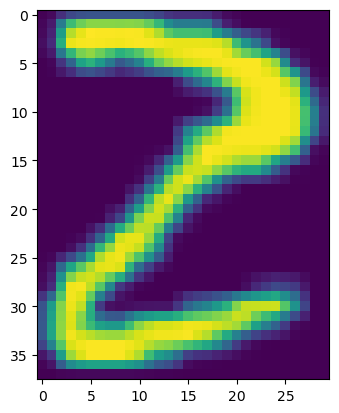

In [22]:
first_digit_cropped = crop_digit(first_digit, plot=True)
second_digit_cropped = crop_digit(second_digit, plot=True)

In [23]:
# TODO: should we also take into account rotation of digits?
###  The paper doesn't seem to apply it

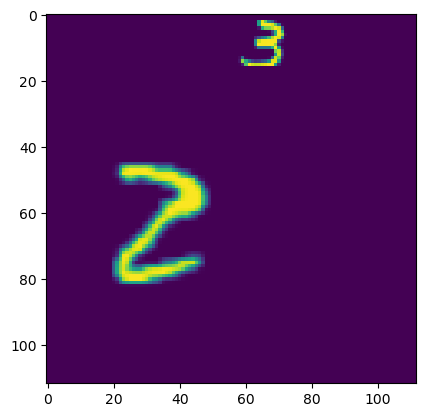

The size of the first digit is ((20, 20))
The size of the second digit is ((50, 50))


In [24]:
overlay_small_img_on_large_img_at_random_position(
    canvas, second_digit_cropped, is_large_img_grayscale=True)
overlay_small_img_on_large_img_at_random_position(
    canvas, first_digit_cropped, is_large_img_grayscale=True)
plt.imshow(canvas)
plt.show()
print(f"The size of the first digit is ({size_first_digit, size_first_digit})")
print(f"The size of the second digit is ({size_second_digit, size_second_digit})")